# My first applied machine learning notebook. 
We are going to get some data about cars and use it to create and evaluate a predictive model.  Here are the steps will we use:
1. Read in the data from a CSV file
2. Clean the data
3. Create a model and fit it to the data
4. Get performance metrics for the model

### Getting the data:
We need to get the data where we can find it.   Copy automobile_price_data3.csv into the same Getting the data:

* Assignment is not an expression. Nothing is displayed.
* Print will cause something to be displayed.
* The last expression evaluated in a cell will be displayed.

Index(['normalized-losses', 'make', 'fuel', 'doors', 'body', 'drive', 'weight',
       'engine-size', 'bhp', 'mpg', 'price'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   make               205 non-null    object 
 2   fuel               205 non-null    object 
 3   doors              203 non-null    object 
 4   body               205 non-null    object 
 5   drive              205 non-null    object 
 6   weight             205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bhp                203 non-null    float64
 9   mpg                205 non-null    int64  
 10  price              201 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 17.7+ KB


array([[<AxesSubplot: title={'center': 'normalized-losses'}>,
        <AxesSubplot: title={'center': 'weight'}>],
       [<AxesSubplot: title={'center': 'engine-size'}>,
        <AxesSubplot: title={'center': 'bhp'}>],
       [<AxesSubplot: title={'center': 'mpg'}>,
        <AxesSubplot: title={'center': 'price'}>]], dtype=object)

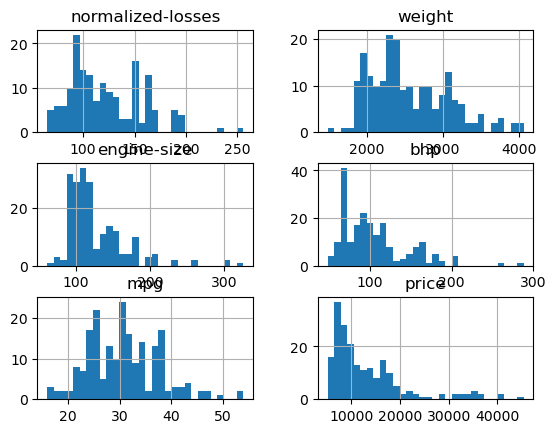

In [2]:
import pandas as pd
data_frame = pd.read_csv("automobile_price_data3.csv")
3**10
print(data_frame.keys())
print()
data_frame.head(n=10)
data_frame.info()
data_frame.hist(bins=30)

### Clean the data:
Remove columns or rows that have missing data.
Look at the distribution of the data values

In [4]:
data_frame.drop(axis='columns', labels='normalized-losses', inplace=True)
data_frame.dropna(axis='index', how="any", inplace=True)

KeyError: "['normalized-losses'] not found in axis"

### Create and train a model
We need to split the data into a training set and a test set

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_frame,
test_size=0.2, random_state=123)
print(len(train_set), len(test_set))
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X = train_set[['weight', 'engine-size', 'bhp', 'mpg']]
y = train_set["price"]
reg.fit(X, y)

157 40


LinearRegression()

### Determine the performance of the model

In [10]:
print("The bias is " , reg.intercept_)
print("The feature coefficients are ", reg.coef_)
print("The score for the training set is", reg.score(X,y))
# Check the performance on the test set
X_test = test_set[['weight', 'engine-size', 'bhp', 'mpg']]
y_test = test_set["price"]
print("The score for the test set is", reg.score(X_test,y_test))

The bias is  -17922.524136526546
The feature coefficients are  [ 4.58631495 82.32373485 66.79759309 72.85364667]
The score for the training set is 0.8230155353613751
The score for the test set is 0.5528901621626465
